In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
#https://www.kaggle.com/datasets/andy8744/udacity-self-driving-car-behavioural-cloning

In [3]:
dir = "/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Behaviourcloning/self_driving_car_dataset_jungle"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(dir, "driving_log.csv"), names=columns)
pd.set_option("display.max_colwidth", -1)
data.head()

center  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\center_2022_04_10_12_44_27_913.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\center_2022_04_10_12_44_27_983.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\center_2022_04_10_12_44_28_052.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\center_2022_04_10_12_44_28_121.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\center_2022_04_10_12_44_28_191.jpg   

                                                                                         left  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\left_2022_04_10_12_44_27_913.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\left_2022_04_10_12_44_27_983.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\left_2022_04_10_12_44_28_052.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\left_2022_04_10_12_44_28_121.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\left_2022_04_10_12_44_28_191.jpg   

                                                                                         right  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\right_2022_04_10_12_44_27_913.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\right_2022_04_10_12_44_27_983.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\right_2022_04_10_12_44_28_052.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\right_2022_04_10_12_44_28_121.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset_jungle\IMG\right_2022_04_10_12_44_28_191.jpg   

   steering  throttle  reverse     speed  
0  0.00      1.0       0        21.69488  
1  0.00      1.0       0        22.50011  
2  0.00      1.0       0        23.11461  
3  0.00      1.0       0        23.89061  
4  0.05      1.0       0        24.46815

In [9]:
data1 = pd.read_csv('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Behaviourcloning/self_driving_car_dataset_jungle/driving_log.csv')

In [10]:
data1.shape

(3403, 7)

In [11]:
def pathleaf(path):
    head, tail = ntpath.split(path)
    return tail

data["center"] = data["center"].apply(pathleaf)
data["left"] = data["left"].apply(pathleaf)
data["right"] = data["right"].apply(pathleaf)
data.head()

center                              left  \
0  center_2022_04_10_12_44_27_913.jpg  left_2022_04_10_12_44_27_913.jpg   
1  center_2022_04_10_12_44_27_983.jpg  left_2022_04_10_12_44_27_983.jpg   
2  center_2022_04_10_12_44_28_052.jpg  left_2022_04_10_12_44_28_052.jpg   
3  center_2022_04_10_12_44_28_121.jpg  left_2022_04_10_12_44_28_121.jpg   
4  center_2022_04_10_12_44_28_191.jpg  left_2022_04_10_12_44_28_191.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_04_10_12_44_27_913.jpg  0.00      1.0       0        21.69488  
1  right_2022_04_10_12_44_27_983.jpg  0.00      1.0       0        22.50011  
2  right_2022_04_10_12_44_28_052.jpg  0.00      1.0       0        23.11461  
3  right_2022_04_10_12_44_28_121.jpg  0.00      1.0       0        23.89061  
4  right_2022_04_10_12_44_28_191.jpg  0.05      1.0       0        24.46815

In [12]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data["steering"], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


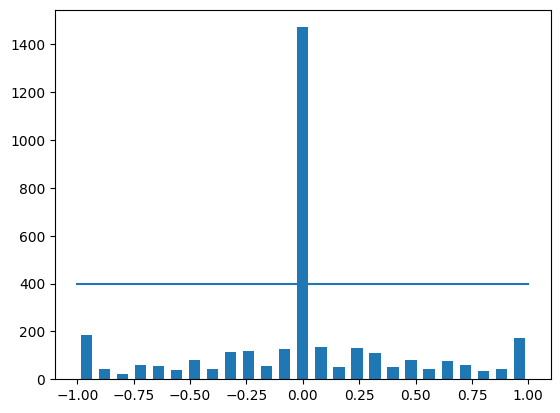

In [13]:
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)

In [14]:
print("Total Data:", len(data))

Total Data: 3404


In [15]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j + 1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
print("Removed:", len(remove_list))

Removed: 1072


In [16]:
data.drop(data.index[remove_list], inplace=True)
print("Remaining:", len(data))


Remaining: 2332


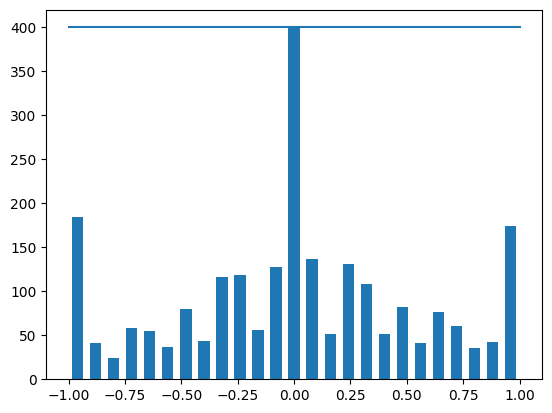

In [17]:
hist, _ = np.histogram(data["steering"], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(
    (np.min(data["steering"]), np.max(data["steering"])),
    (samples_per_bin, samples_per_bin),
)

In [18]:
print(data.iloc[1])

center      center_2022_04_10_12_44_28_121.jpg
left        left_2022_04_10_12_44_28_121.jpg  
right       right_2022_04_10_12_44_28_121.jpg 
steering    0.0                               
throttle    1.0                               
reverse     0                                 
speed       23.89061                          
Name: 3, dtype: object


In [19]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.15)
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [20]:
image_paths, steerings = load_img_steering(dir + "/IMG", data)
X_train, X_valid, y_train, y_valid = train_test_split(
    image_paths, steerings, test_size=0.2, random_state=6
)
print("Training Samples: {}\nValid Samples: {}".format(len(X_train), len(X_valid)))

Training Samples: 5596
Valid Samples: 1400


Text(0.5, 1.0, 'Validation set')

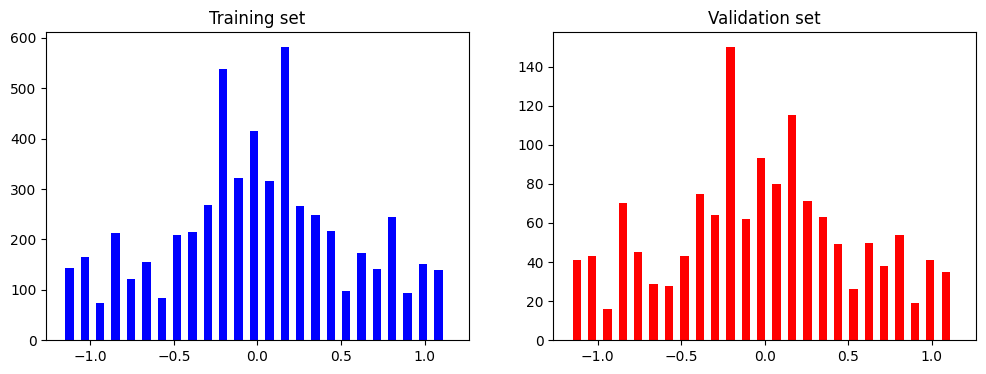

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color="blue")
axes[0].set_title("Training set")
axes[1].hist(y_valid, bins=num_bins, width=0.05, color="red")
axes[1].set_title("Validation set")

Text(0.5, 1.0, 'Zoomed Image')

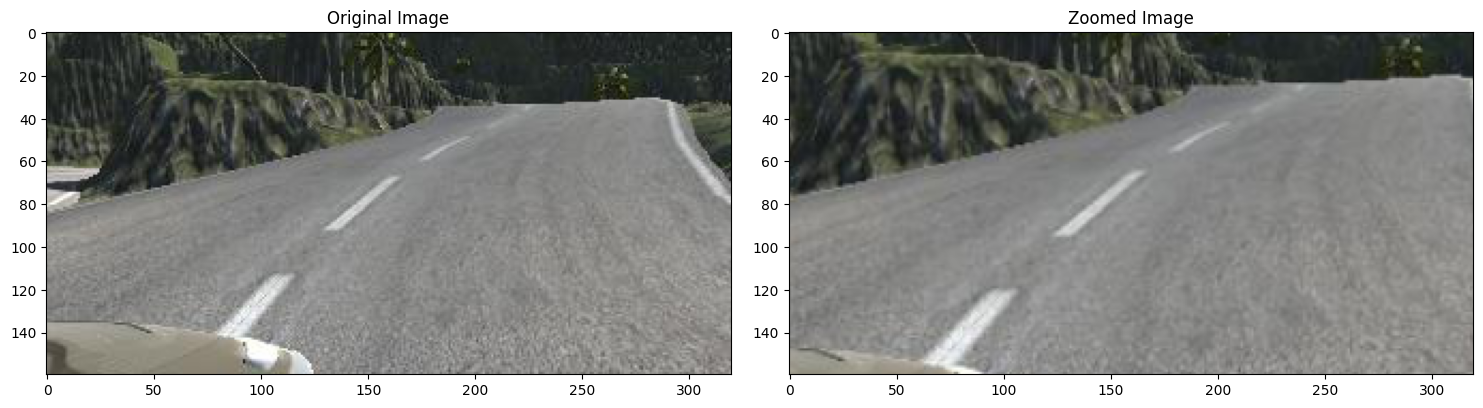

In [22]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image")

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.35')

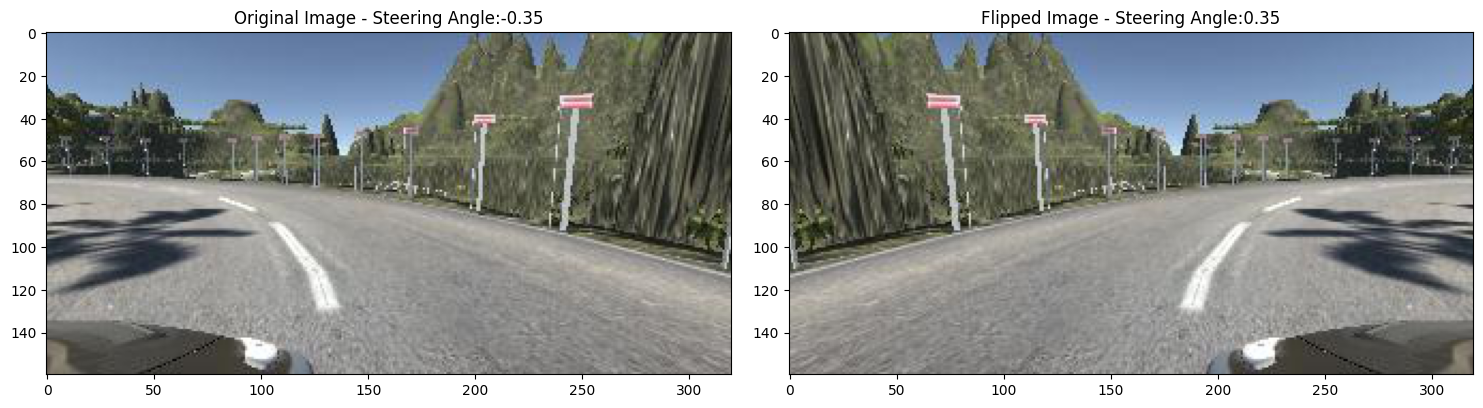

In [23]:
def random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image - " + "Steering Angle:" + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("Flipped Image - " + "Steering Angle:" + str(flipped_steering_angle))

Text(0.5, 1.0, 'Panned Image')

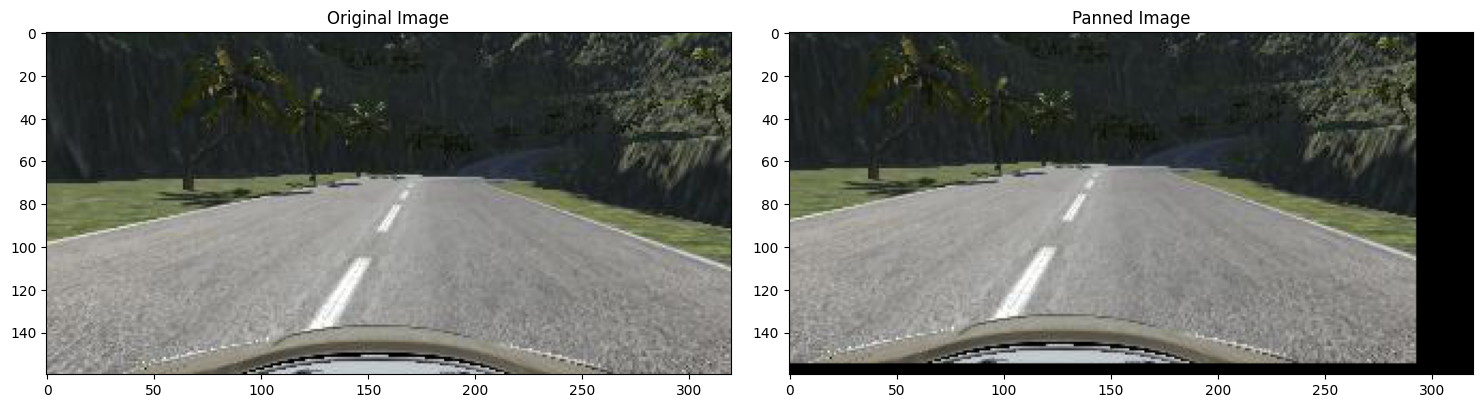

In [24]:
def pan(image):
    pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")

Text(0.5, 1.0, 'Brightness altered image ')

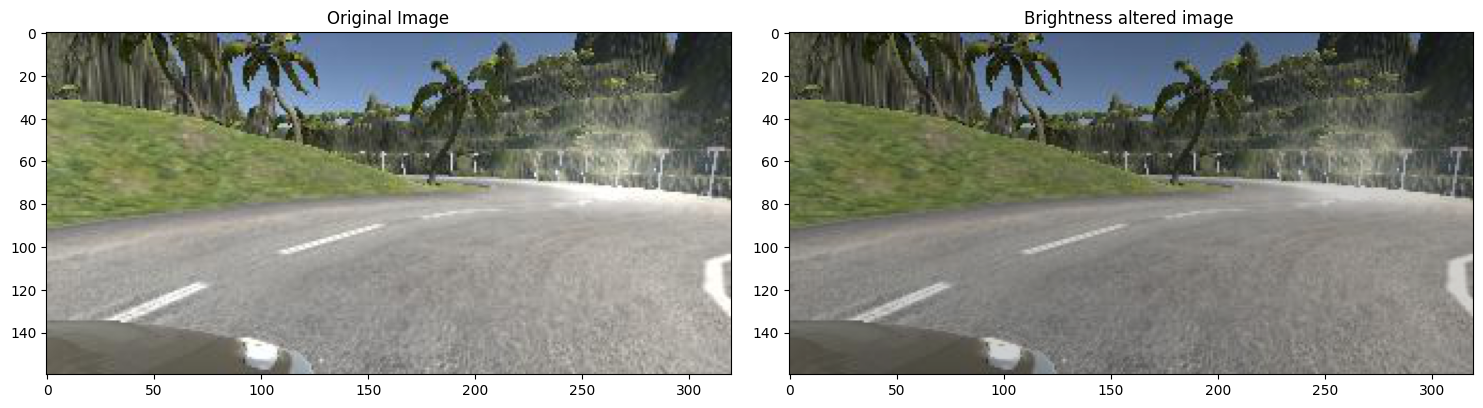

In [25]:
def random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(brightness_altered_image)
axs[1].set_title("Brightness altered image ")

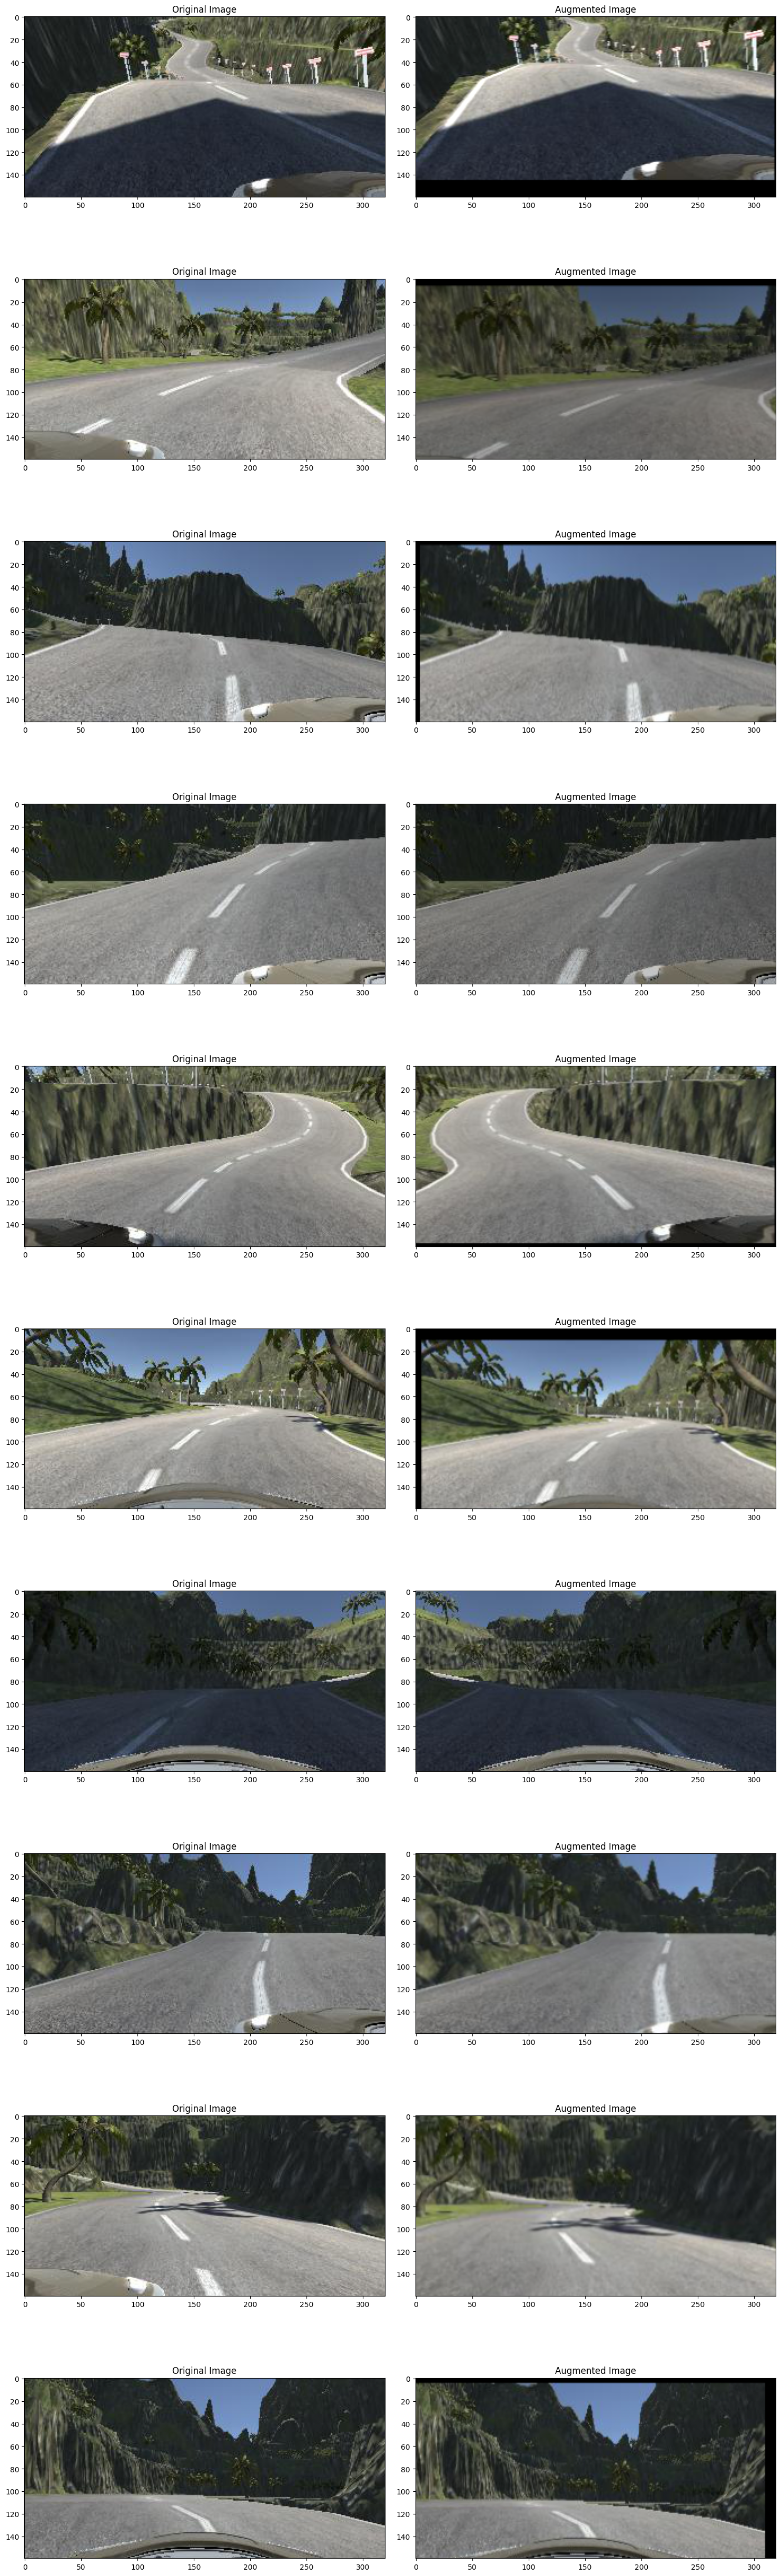

In [26]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = random_flip(image, steering_angle)
    return image, steering_angle

ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

In [27]:
def img_preprocess(img):
    ## Crop image to remove unnecessary features
    img = img[60:135, :, :]
    ## Change to YUV image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    ## Gaussian blur
    img = cv2.GaussianBlur(img, (3, 3), 0)
    ## Decrease size for easier processing
    img = cv2.resize(img, (200, 66))
    ## Normalize values
    img = img / 255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

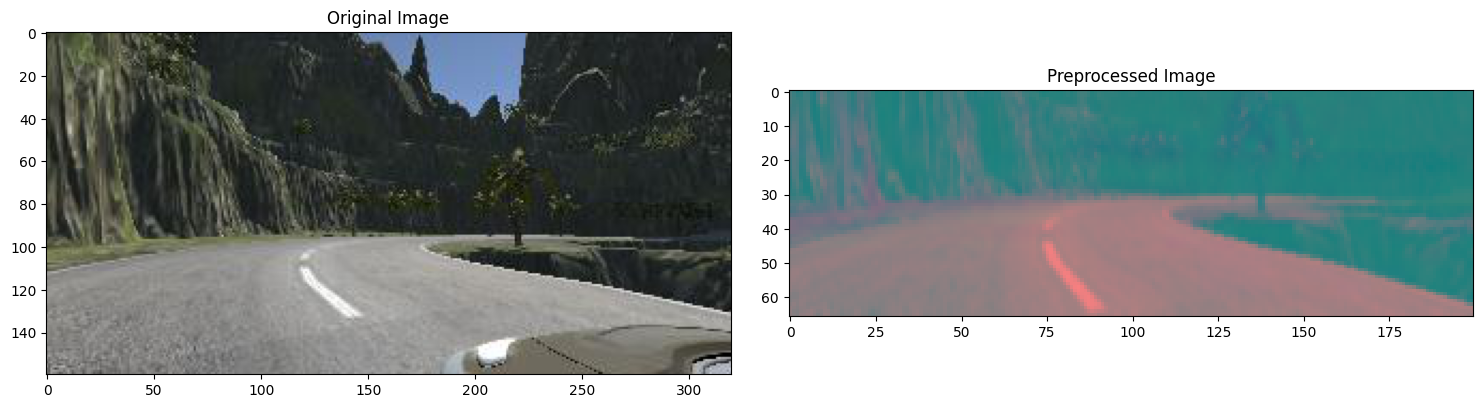

In [28]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed Image")

In [ ]:
!pip install random_augment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement random_augment (from versions: none)
ERROR: No matching distribution found for random_augment


In [29]:
import random

def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(
                    image_paths[random_index], steering_ang[random_index]
                )

            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

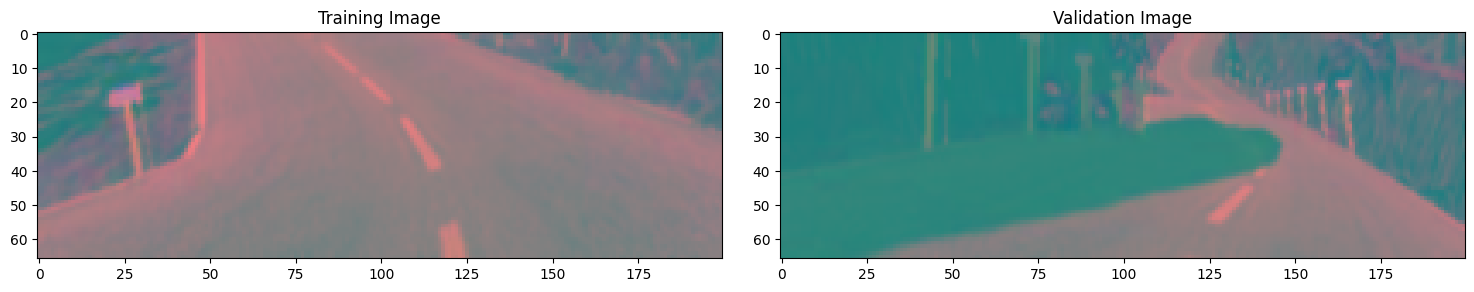

In [30]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title("Training Image")

axs[1].imshow(x_valid_gen[0])
axs[1].set_title("Validation Image")

In [33]:
def SdcModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  return model

In [34]:
model = SdcModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout_4 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [35]:
history = model.fit_generator(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=300,
    epochs=50,
    batch_size = 100,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=200,
    verbose=1,
    shuffle=1,
)


Epoch 1/50


2022-12-19 10:12:10.107984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-19 10:12:10.421944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - ETA: 0s - loss: 0.2441

2022-12-19 10:12:58.677110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 64s 211ms/step - loss: 0.2441 - val_loss: 0.1682
Epoch 2/50
300/300 [==============================] - 60s 199ms/step - loss: 0.1822 - val_loss: 0.1512
Epoch 3/50
300/300 [==============================] - 58s 193ms/step - loss: 0.1686 - val_loss: 0.1489
Epoch 4/50
300/300 [==============================] - 58s 192ms/step - loss: 0.1640 - val_loss: 0.1497
Epoch 5/50
300/300 [==============================] - 58s 193ms/step - loss: 0.1625 - val_loss: 0.1401
Epoch 6/50
300/300 [==============================] - 58s 193ms/step - loss: 0.1554 - val_loss: 0.1464
Epoch 7/50
300/300 [==============================] - 60s 199ms/step - loss: 0.1555 - val_loss: 0.1392
Epoch 8/50
300/300 [==============================] - 59s 196ms/step - loss: 0.1526 - val_loss: 0.1333
Epoch 9/50
300/300 [==============================] - 59s 195ms/step - loss: 0.1519 - val_loss: 0.1389
Epoch 10/50
300/300 [==============================] - 58s 194ms/step - loss: 0.1464

Text(0.5, 0, 'Epoch')

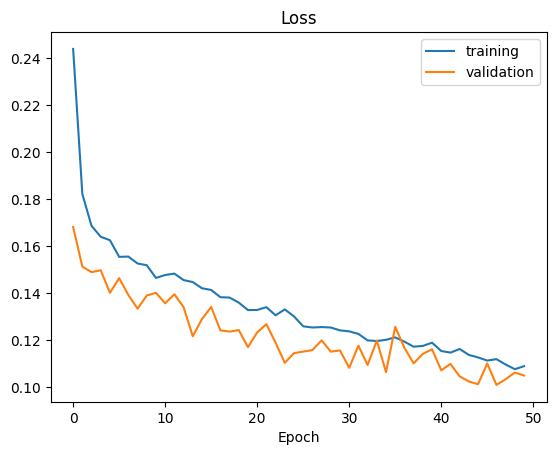

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training", "validation"])
plt.title("Loss")
plt.xlabel("Epoch")

In [32]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["training", "validation"])
plt.title("Accuracy")
plt.xlabel("Epoch")

NameError: name 'history' is not defined

In [33]:
model.save('/Users/kanishkhajaisankar/Downloads/Projects/Self_driving_car/Behaviourcloning/self_driving_car_dataset_jungle/self_driving_car_sdcCNN.h5')

In [33]:
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

resnet_50 = ResNet50(weights='imagenet')

def ResnetModel():
  base_model = resnet_50

  model = Sequential()
  model.add(base_model)
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3), loss="mse")
  return model


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-19 12:12:10.401146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 12:12:10.402816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
model = ResnetModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 25,637,713
Trainable params: 25,584,593
Non-trainable params: 53,120
_________________________________________________________________
None


In [39]:

history = model.fit_generator(
    batch_generator(X_train, y_train, 32, 1),
    steps_per_epoch=50,
    epochs=30,
    validation_data=batch_generator(X_valid, y_valid, 32, 0),
    validation_steps=200,
    verbose=1,
    shuffle=1,
)

Epoch 1/30
50/50 [==============================] - 42s 842ms/step - loss: 0.2795 - val_loss: 0.3224
Epoch 2/30
50/50 [==============================] - 42s 841ms/step - loss: 0.2870 - val_loss: 0.3310
Epoch 3/30
50/50 [==============================] - 41s 832ms/step - loss: 0.2720 - val_loss: 0.3399
Epoch 4/30
50/50 [==============================] - 808s 16s/step - loss: 0.2561 - val_loss: 0.3517
Epoch 5/30
50/50 [==============================] - 40s 804ms/step - loss: 0.2618 - val_loss: 0.3539
Epoch 6/30
50/50 [==============================] - 39s 796ms/step - loss: 0.2859 - val_loss: 0.3261
Epoch 7/30
50/50 [==============================] - 40s 797ms/step - loss: 0.2943 - val_loss: 0.3485
Epoch 8/30
50/50 [==============================] - 40s 798ms/step - loss: 0.2575 - val_loss: 0.3245
Epoch 9/30
50/50 [==============================] - 39s 796ms/step - loss: 0.2444 - val_loss: 0.3459
Epoch 10/30
50/50 [==============================] - 40s 800ms/step - loss: 0.2269 - val_los

Text(0.5, 0, 'Epoch')

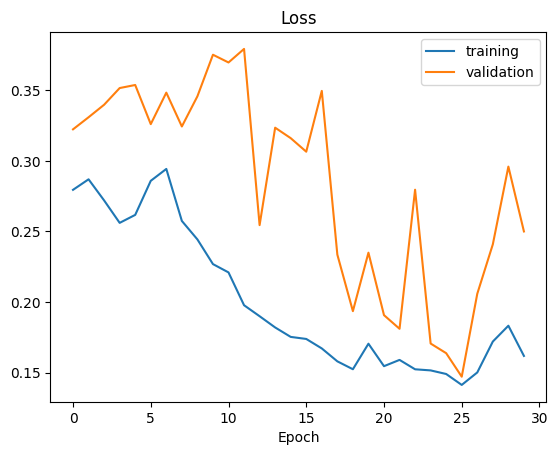

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training", "validation"])
plt.title("Loss")
plt.xlabel("Epoch")

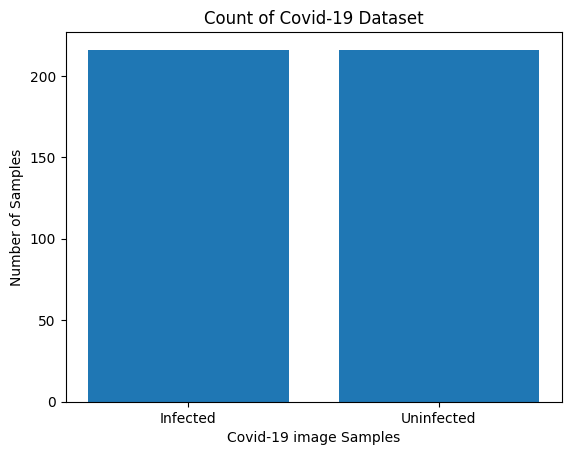

In [3]:
import matplotlib.pyplot as plt

categories = ['Infected', 'Uninfected']
samples = [216, 216]

plt.bar(categories[0], samples[0], color='red')
plt.bar(categories[1], samples[1], color='green')
plt.xlabel('Covid-19 image Samples')
plt.ylabel('Number of Samples')
plt.title('Count of Covid-19 Dataset')
plt.ylim(0, 300)
plt.show()
